## Import Library

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from datetime import date
from functools import reduce

## Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/superstore.csv', encoding='cp1252')
pd.set_option('display.max_columns', None)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Preprocessing

In [ ]:
data = data.drop(["Row ID", "Ship Date", "Ship Mode", "Customer Name", "Country", "State", "Postal Code", "Region", "Sub-Category", "Product Name", "Discount", "Profit"], axis=1)
data.head()

,Order ID,Order Date,Customer ID,Segment,City,Product ID,Category,Sales,Quantity
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Henderson,FUR-BO-10001798,Furniture,261.9600,2
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Henderson,FUR-CH-10000454,Furniture,731.9400,3
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Los Angeles,OFF-LA-10000240,Office Supplies,14.6200,2
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Fort Lauderdale,FUR-TA-10000577,Furniture,957.5775,5
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Fort Lauderdale,OFF-ST-10000760,Office Supplies,22.3680,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     9994 non-null   object 
 1   Order Date   9994 non-null   object 
 2   Customer ID  9994 non-null   object 
 3   Segment      9994 non-null   object 
 4   City         9994 non-null   object 
 5   Product ID   9994 non-null   object 
 6   Category     9994 non-null   object 
 7   Sales        9994 non-null   float64
 8   Quantity     9994 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 702.8+ KB


In [ ]:
print("Jumlah duplikasi data : " + str(data.duplicated().sum()))

Jumlah duplikasi data : 1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
negative_sales = data[data["Sales"] < 0]
negative_sales.head()

,Order ID,Order Date,Customer ID,Segment,City,Product ID,Category,Sales,Quantity


In [ ]:
negative_quantity = data[data["Quantity"] < 0]
negative_quantity.head()

,Order ID,Order Date,Customer ID,Segment,City,Product ID,Category,Sales,Quantity


## Feature Engineering

### Total Products Purchased (F)


In [ ]:
data_total_products_purchased = data.groupby(["Customer ID"], as_index=False)['Quantity'].sum()
data_total_products_purchased.rename(columns={"Quantity": "Total Products Purchased"}, inplace=True)
data_total_products_purchased.head(10)

,Customer ID,Total Products Purchased
0,AA-10315,30
1,AA-10375,41
2,AA-10480,36
3,AA-10645,64
4,AB-10015,13
5,AB-10060,56
6,AB-10105,73
7,AB-10150,37
8,AB-10165,48
9,AB-10255,39


### Unique Total Category Purchased - Products Diversity

In [ ]:
unique_total_category = data.groupby(["Customer ID"], as_index=False)['Category'].nunique()
unique_total_category.rename(columns={"Category": "Unique Total Category Purchased"}, inplace=True)
unique_total_category.head(10)

,Customer ID,Unique Total Category Purchased
0,AA-10315,3
1,AA-10375,3
2,AA-10480,3
3,AA-10645,3
4,AB-10015,3
5,AB-10060,3
6,AB-10105,3
7,AB-10150,3
8,AB-10165,3
9,AB-10255,3


### Days Since Last Purchased (R)

In [ ]:
# Convert to datetime object
data['Order Date'] = pd.to_datetime(data['Order Date'])

last_purchased_date = data.groupby(["Customer ID"], as_index=False)['Order Date'].max()

max_date = data['Order Date'].max() + pd.Timedelta(3, "d")
last_purchased_date['Days Since Last Purchased'] = (max_date - last_purchased_date['Order Date']).dt.days
last_purchased_date.sort_values(by='Days Since Last Purchased', ascending=True)
last_purchased_date = last_purchased_date.drop(['Order Date'], axis=1)
last_purchased_date

,Customer ID,Days Since Last Purchased
0,AA-10315,187
1,AA-10375,22
2,AA-10480,262
3,AA-10645,58
4,AB-10015,418
...,...,...
788,XP-21865,46
789,YC-21895,7
790,YS-21880,12
791,ZC-21910,57


### Total frequency transaction (F)

In [ ]:
total_transaction = data.groupby('Customer ID')['Order ID'].nunique()
total_transaction = total_transaction.to_frame().reset_index()
total_transaction.columns = ['Customer ID', 'Total Transaction']
total_transaction

,Customer ID,Total Transaction
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3
...,...,...
788,XP-21865,11
789,YC-21895,5
790,YS-21880,8
791,ZC-21910,13


### Average Sales (M)

In [ ]:
total_spend_per_transaction = data.groupby(['Customer ID'], as_index=False)['Sales'].sum()

average_transaction = pd.merge(total_transaction, total_spend_per_transaction, on='Customer ID')
average_transaction['Average Sales'] = average_transaction['Sales'] / average_transaction['Total Transaction']
average_transaction.columns = ['Customer ID', 'Total Transaction', 'Total Sales', 'Average Sales']
average_transaction

,Customer ID,Total Transaction,Total Sales,Average Sales
0,AA-10315,5,5563.560,1112.712000
1,AA-10375,9,1056.390,117.376667
2,AA-10480,4,1790.512,447.628000
3,AA-10645,6,5086.935,847.822500
4,AB-10015,3,886.156,295.385333
...,...,...,...,...
788,XP-21865,11,2374.658,215.878000
789,YC-21895,5,5454.350,1090.870000
790,YS-21880,8,6720.444,840.055500
791,ZC-21910,13,8025.707,617.362077


### Monthly Spending Mean (Pattern)

In [ ]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

monthly_spending_mean = data.groupby(['Customer ID', 'Year', 'Month'], as_index=False)['Sales'].sum()
monthly_spending_mean = monthly_spending_mean.groupby(['Customer ID'], as_index=False)['Sales'].mean()
monthly_spending_mean.rename(columns={"Sales": "Monthly Spending Mean"}, inplace=True)
monthly_spending_mean

,Customer ID,Monthly Spending Mean
0,AA-10315,1112.712000
1,AA-10375,117.376667
2,AA-10480,447.628000
3,AA-10645,847.822500
4,AB-10015,295.385333
...,...,...
788,XP-21865,296.832250
789,YC-21895,1090.870000
790,YS-21880,840.055500
791,ZC-21910,891.745222


### Monthly Spending Standard Deviation

In [ ]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

monthly_spending_std = data.groupby(['Customer ID', 'Year', 'Month'], as_index=False)['Sales'].sum()
monthly_spending_std = monthly_spending_std.groupby(['Customer ID'], as_index=False)['Sales'].std()
monthly_spending_std.rename(columns={"Sales": "Monthly Spending Std"}, inplace=True)
monthly_spending_std['Monthly Spending Std'].fillna(0, inplace=True)
monthly_spending_std

,Customer ID,Monthly Spending Std
0,AA-10315,1863.634544
1,AA-10375,160.542898
2,AA-10480,544.047829
3,AA-10645,759.730610
4,AB-10015,275.932428
...,...,...
788,XP-21865,253.385888
789,YC-21895,1214.932890
790,YS-21880,1257.954059
791,ZC-21910,793.602738


### Average days between purchases

In [ ]:
customer_order = data.groupby(['Customer ID', 'Order ID'], as_index=False)['Order Date'].max()
customer_order.sort_values(by = 'Order Date', inplace=True)
customer_order['Days Between Orders'] = customer_order.groupby(['Customer ID'])['Order Date'].diff().dt.days
avg_days_between_orders = customer_order.groupby(['Customer ID'], as_index=False)['Days Between Orders'].mean()
avg_days_between_orders.columns = ['Customer ID', 'Average days between order']

avg_days_between_orders

,Customer ID,Average days between order
0,AA-10315,296.500000
1,AA-10375,166.250000
2,AA-10480,359.000000
3,AA-10645,246.400000
4,AB-10015,498.000000
...,...,...
788,XP-21865,139.700000
789,YC-21895,283.750000
790,YS-21880,153.428571
791,ZC-21910,93.333333


### Customer segmentation

In [ ]:
cust_segment = data.groupby(['Customer ID'], as_index=False)['Segment'].agg(pd.Series.mode)
label_encoder = LabelEncoder()
cust_segment['Segment'] = label_encoder.fit_transform(cust_segment['Segment'])
cust_segment

,Customer ID,Segment
0,AA-10315,0
1,AA-10375,0
2,AA-10480,0
3,AA-10645,0
4,AB-10015,0
...,...,...
788,XP-21865,0
789,YC-21895,1
790,YS-21880,1
791,ZC-21910,0


In [ ]:
dataframes = [data_total_products_purchased, unique_total_category, last_purchased_date, average_transaction, monthly_spending_mean, monthly_spending_std, cust_segment]

merged_data = reduce(lambda left, right: pd.merge(left, right, on='Customer ID', how='outer'), dataframes)
merged_data

,Customer ID,Total Products Purchased,Unique Total Category Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std,Segment
0,AA-10315,30,3,187,5,5563.560,1112.712000,1112.712000,1863.634544,0
1,AA-10375,41,3,22,9,1056.390,117.376667,117.376667,160.542898,0
2,AA-10480,36,3,262,4,1790.512,447.628000,447.628000,544.047829,0
3,AA-10645,64,3,58,6,5086.935,847.822500,847.822500,759.730610,0
4,AB-10015,13,3,418,3,886.156,295.385333,295.385333,275.932428,0
...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,100,3,46,11,2374.658,215.878000,296.832250,253.385888,0
789,YC-21895,31,3,7,5,5454.350,1090.870000,1090.870000,1214.932890,1
790,YS-21880,58,3,12,8,6720.444,840.055500,840.055500,1257.954059,1
791,ZC-21910,105,3,57,13,8025.707,617.362077,891.745222,793.602738,0


In [ ]:
merged_data.to_excel('merged.xlsx')

## Outlier Handling

In [ ]:
def check_outliers(df, col):
  col_Q3 = df[col].quantile(0.75)
  col_Q1 = df[col].quantile(0.25)
  col_IQR = col_Q3 - col_Q1
  col_RLB = col_Q1 - 1.5 * col_IQR
  col_RUB = col_Q3 + 1.5 * col_IQR
  col_outlier_df = df.loc[(df[col] < col_RLB) | (df[col] > col_RUB)]
  print(f"Number of outliers in attribute {col}: {len(col_outlier_df)}")
  print(f"Proportion of outliers in attribute {col}: {len(col_outlier_df)/df[col].count()*100}\n")

  return int(len(col_outlier_df))

In [ ]:
outlier_col = []
for num_col in merged_data.select_dtypes(np.number).columns:
  outlier = check_outliers(merged_data, num_col)
  if(outlier > 0):
    outlier_col.append(num_col)

Number of outliers in attribute Total Products Purchased: 14
Proportion of outliers in attribute Total Products Purchased: 1.7654476670870116

Number of outliers in attribute Unique Total Category Purchased: 176
Proportion of outliers in attribute Unique Total Category Purchased: 22.194199243379572

Number of outliers in attribute Days Since Last Purchased: 74
Proportion of outliers in attribute Days Since Last Purchased: 9.331651954602775

Number of outliers in attribute Total Transaction: 8
Proportion of outliers in attribute Total Transaction: 1.008827238335435

Number of outliers in attribute Total Sales: 43
Proportion of outliers in attribute Total Sales: 5.422446406052964

Number of outliers in attribute Average Sales: 51
Proportion of outliers in attribute Average Sales: 6.431273644388398

Number of outliers in attribute Monthly Spending Mean: 40
Proportion of outliers in attribute Monthly Spending Mean: 5.044136191677175

Number of outliers in attribute Monthly Spending Std: 56

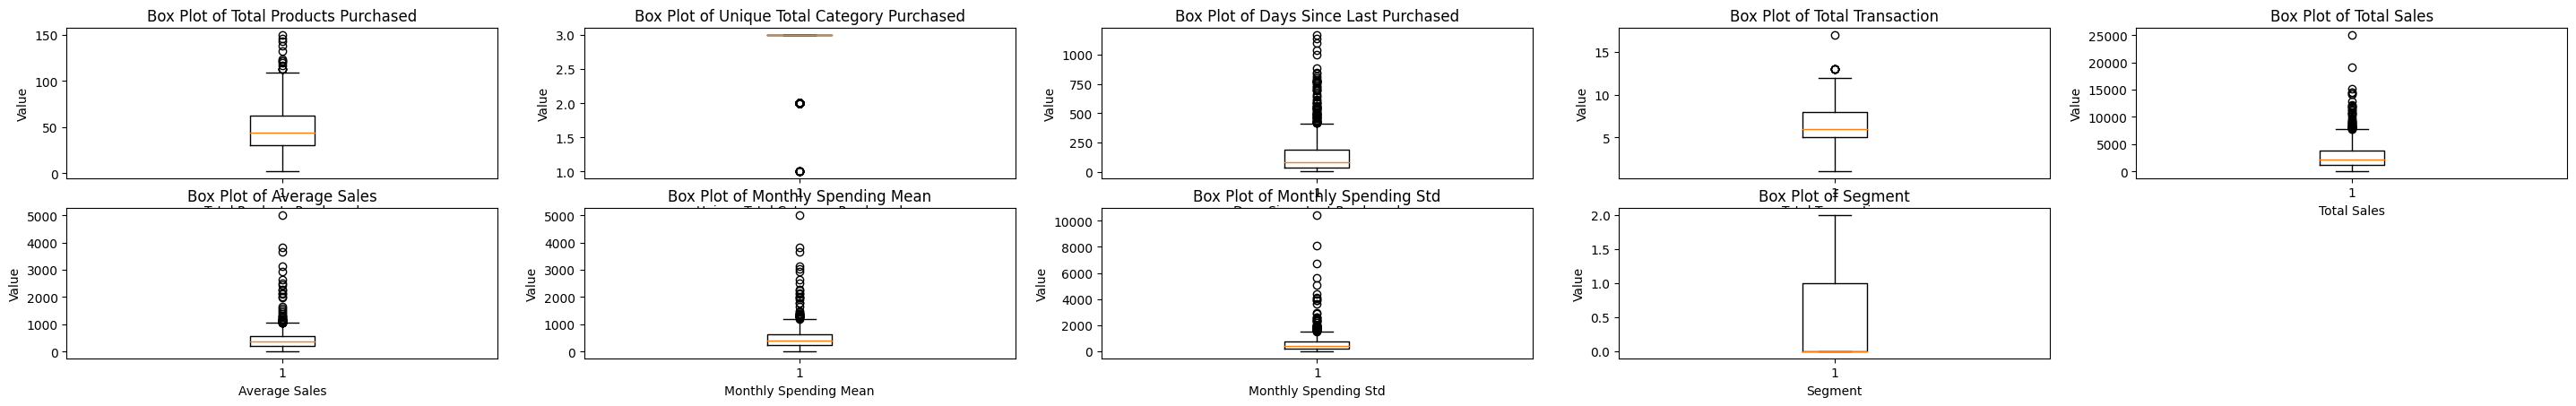

In [ ]:
num_col = merged_data.select_dtypes(include='number')

plt.figure(figsize=(36, 10))
counter = 1

for columnName, columnData in num_col.items():
    plt.subplot(4, 5, counter)
    plt.boxplot(num_col[columnName])
    plt.title('Box Plot of ' + columnName)
    plt.xlabel(columnName)
    plt.ylabel('Value')
    counter+=1

plt.show()

In [ ]:
for col in outlier_col:
  merged_data[col] = merged_data[col].apply(lambda x: np.log(x) if x > 0 else x)

merged_data

,Customer ID,Total Products Purchased,Unique Total Category Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std,Segment
0,AA-10315,3.401197,1.098612,5.231109,1.609438,8.623993,7.014556,7.014556,7.530284,0
1,AA-10375,3.713572,1.098612,3.091042,2.197225,6.962613,4.765388,4.765388,5.078561,0
2,AA-10480,3.583519,1.098612,5.568345,1.386294,7.490257,6.103963,6.103963,6.299037,0
3,AA-10645,4.158883,1.098612,4.060443,1.791759,8.534431,6.742671,6.742671,6.632964,0
4,AB-10015,2.564949,1.098612,6.035481,1.098612,6.786893,5.688281,5.688281,5.620156,0
...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,4.605170,1.098612,3.828641,2.397895,7.772609,5.374713,5.693167,5.534914,0
789,YC-21895,3.433987,1.098612,1.945910,1.609438,8.604169,6.994731,6.994731,7.102444,1
790,YS-21880,4.060443,1.098612,2.484907,2.079442,8.812910,6.733468,6.733468,7.137242,1
791,ZC-21910,4.653960,1.098612,4.043051,2.564949,8.990405,6.425456,6.793180,6.676583,0


## Feature Scaling

In [ ]:
scaler = StandardScaler()

exclude_col = ['Customer ID', 'Segment']
col_to_scale = merged_data.columns.difference(exclude_col)
merged_data_scaled = merged_data.copy()
merged_data_scaled[col_to_scale] = scaler.fit_transform(merged_data_scaled[col_to_scale])
merged_data_scaled = pd.DataFrame(merged_data_scaled, columns=merged_data.columns)
merged_data_scaled

,Customer ID,Total Products Purchased,Unique Total Category Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std,Segment
0,AA-10315,-0.499270,0.473502,0.731023,-0.289781,1.010560,1.411548,1.305674,1.244960,0
1,AA-10375,0.009097,0.473502,-1.019748,0.952966,-0.565210,-1.228577,-1.295559,-0.630291,0
2,AA-10480,-0.202555,0.473502,1.006913,-0.761570,-0.064755,0.342673,0.252545,0.303215,0
3,AA-10645,0.733808,0.473502,-0.226689,0.095698,0.925613,1.092404,0.991231,0.558626,0
4,AB-10015,-1.860203,0.473502,1.389074,-1.369811,-0.731875,-0.145264,-0.228205,-0.216041,0
...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,1.460108,0.473502,-0.416324,1.377241,0.203047,-0.513337,-0.222553,-0.281240,0
789,YC-21895,-0.445907,0.473502,-1.956571,-0.289781,0.991757,1.388277,1.282746,0.917718,1
790,YS-21880,0.573604,0.473502,-1.515623,0.703939,1.189741,1.081601,0.980587,0.944334,1
791,ZC-21910,1.539510,0.473502,-0.240917,1.730440,1.358091,0.720049,1.049647,0.591989,0


## Feature Selection (PCA)

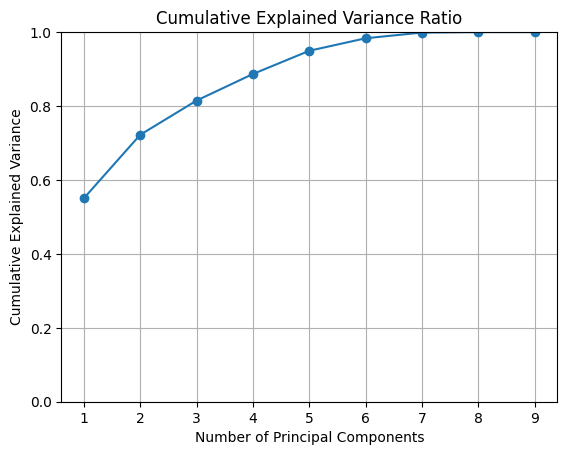

In [ ]:
merged_data_scaled.set_index('Customer ID', inplace=True)

pca = PCA()
X_pca = pca.fit_transform(merged_data_scaled)

explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, 10), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 10))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=5)
merged_data_pca = pca.fit_transform(merged_data_scaled)
merged_data_pca = pd.DataFrame(merged_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])
merged_data_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.792450,1.862220,-0.099399,-0.812478,0.177515
1,0.933252,-2.259184,0.068161,-0.626994,0.056020
2,-0.033784,1.072450,-0.677602,-0.912362,-0.037109
3,-1.922075,0.447633,0.231669,-0.640448,0.317667
4,1.693863,1.610969,-0.654565,-1.329927,-0.589522
...,...,...,...,...,...
788,-0.840269,-1.858800,-0.575603,-0.272262,0.632790
789,-1.989399,0.571868,2.183094,-0.174343,-0.784438
790,-2.473320,-0.302752,1.232367,0.259272,-0.235480
791,-2.804092,-0.769896,-0.380068,-0.131351,0.948565


## K-Means Clustering